<a href="https://colab.research.google.com/github/Piya88/Loan_Approval_Prediction/blob/main/Loan_Approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction:


In [ ]:
# Let's import libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Export data in pandas dataframe

lp = pd.read_csv("/content/drive/MyDrive/loan_approval_dataset.csv")
lp.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
lp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Let's check if there is any missing or null data point.
lp.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
lp.min()

loan_id                              1
 no_of_dependents                    0
 education                    Graduate
 self_employed                      No
 income_annum                   200000
 loan_amount                    300000
 loan_term                           2
 cibil_score                       300
 residential_assets_value      -100000
 commercial_assets_value             0
 luxury_assets_value            300000
 bank_asset_value                    0
 loan_status                  Approved
dtype: object

In [ ]:
lp.max()

loan_id                               4269
 no_of_dependents                        5
 education                    Not Graduate
 self_employed                         Yes
 income_annum                      9900000
 loan_amount                      39500000
 loan_term                              20
 cibil_score                           900
 residential_assets_value         29100000
 commercial_assets_value          19400000
 luxury_assets_value              39200000
 bank_asset_value                 14700000
 loan_status                      Rejected
dtype: object

In [ ]:
# we will loose id colun as it doen't havve any significance for this prediction.
lp1= lp.iloc[:, 1:]
lp1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
lp2 = lp1.drop(lp1.columns[[1, 2, 11]], axis=1)

lp2

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


# Data Analysis

<Axes: >

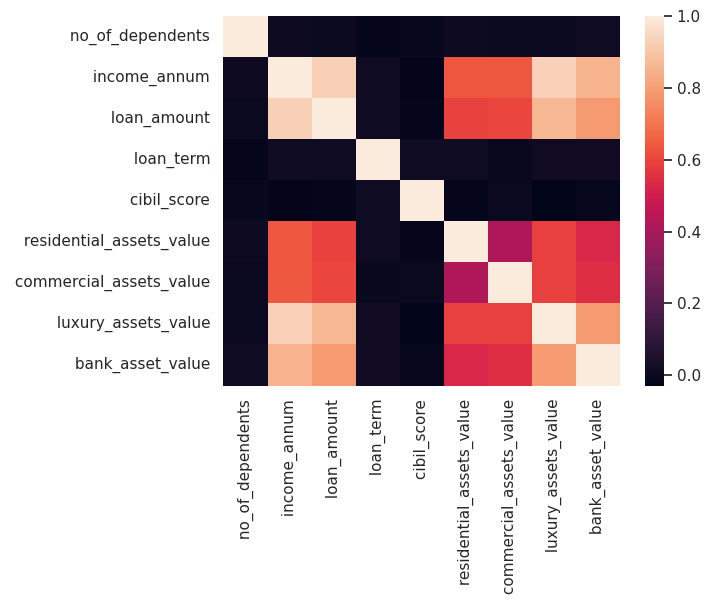

In [ ]:
import seaborn as sns

sns.heatmap(lp2.corr())

Text(0, 0.5, 'cibil_score')

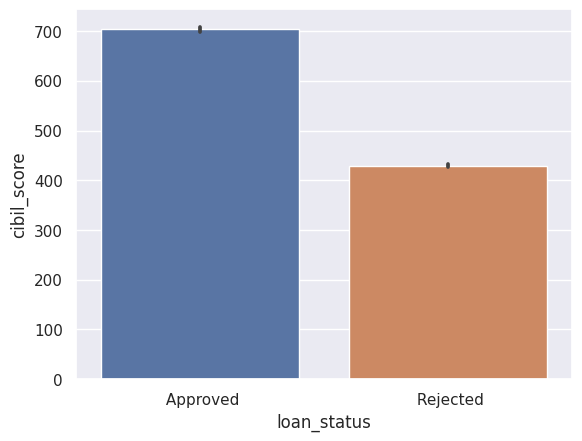

In [ ]:
sns.barplot(x=lp1[' loan_status'], y=lp1[' cibil_score'])
plt.xlabel('loan_status')
plt.ylabel('cibil_score')

Text(0, 0.5, 'loan_amount')

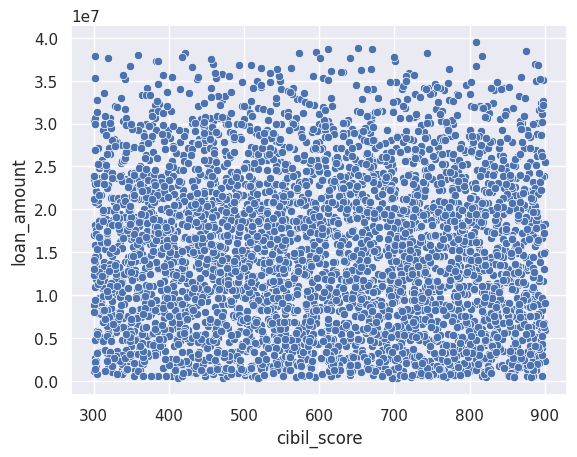

In [ ]:
sns.scatterplot(x=lp1[' cibil_score'], y=lp1[' loan_amount'])
plt.xlabel('cibil_score')
plt.ylabel('loan_amount')

Text(0, 0.5, 'income_annum')

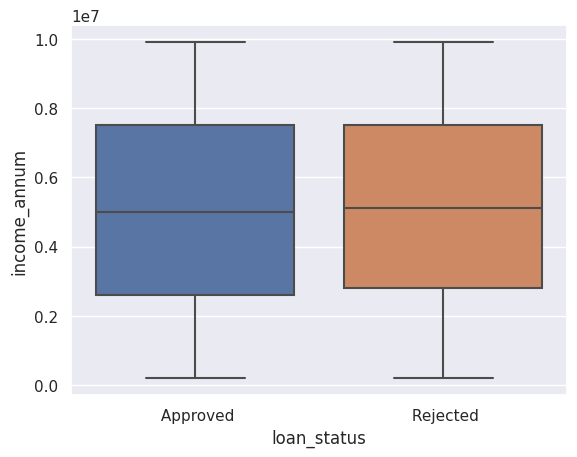

In [ ]:
sns.boxplot(x=lp1[' loan_status'], y=lp1[' income_annum'])
plt.xlabel('loan_status')
plt.ylabel('income_annum')

Text(0, 0.5, 'no_of_dependents')

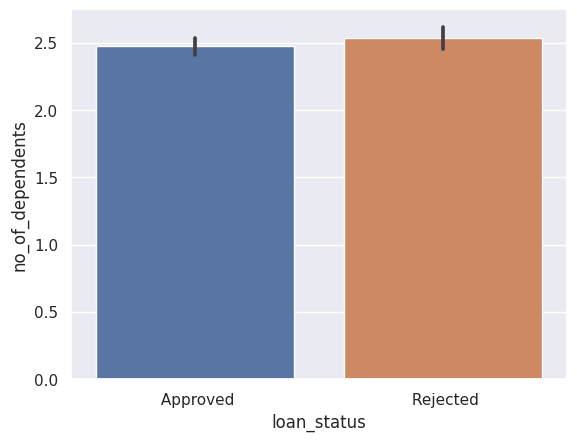

In [ ]:
sns.barplot(x=lp1[' loan_status'], y=lp1[' no_of_dependents'])
plt.xlabel('loan_status')
plt.ylabel('no_of_dependents')

Text(0, 0.5, 'residential_assets_value')

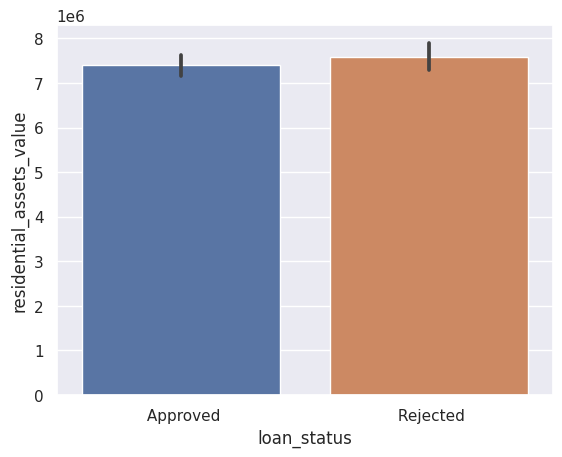

In [ ]:
sns.barplot(x=lp1[' loan_status'], y=lp1[' residential_assets_value'])
plt.xlabel('loan_status')
plt.ylabel('residential_assets_value')

Text(0, 0.5, 'commercial_assets_value')

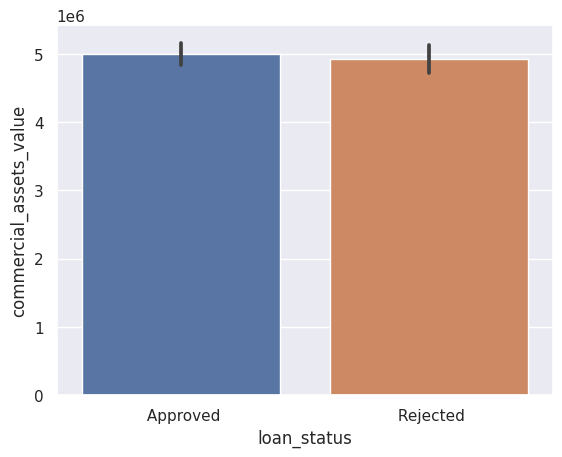

In [ ]:
sns.barplot(x=lp1[' loan_status'], y=lp1[' commercial_assets_value'])
plt.xlabel('loan_status')
plt.ylabel('commercial_assets_value')

Text(0, 0.5, 'luxury_assets_value')

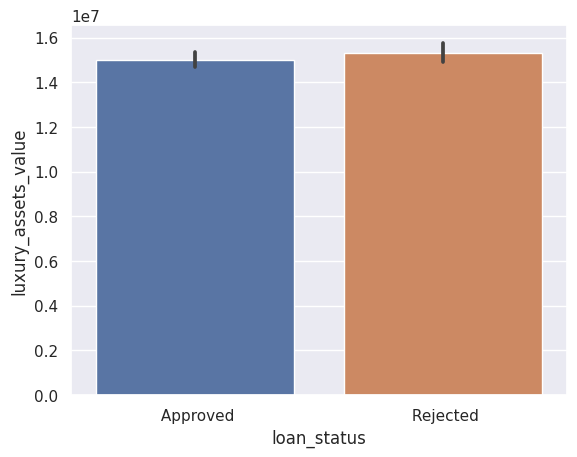

In [ ]:
sns.barplot(x=lp1[' loan_status'], y=lp1[' luxury_assets_value'])
plt.xlabel('loan_status')
plt.ylabel('luxury_assets_value')

Text(0, 0.5, 'bank_asset_value')

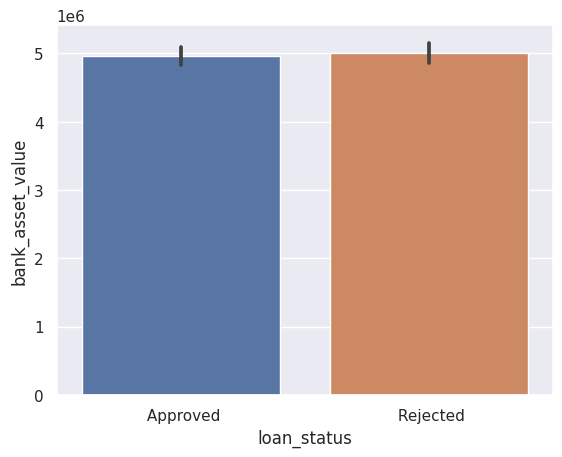

In [ ]:
sns.barplot(x=lp1[' loan_status'], y=lp1[' bank_asset_value'])
plt.xlabel('loan_status')
plt.ylabel('bank_asset_value')

Text(0, 0.5, 'loan_term')

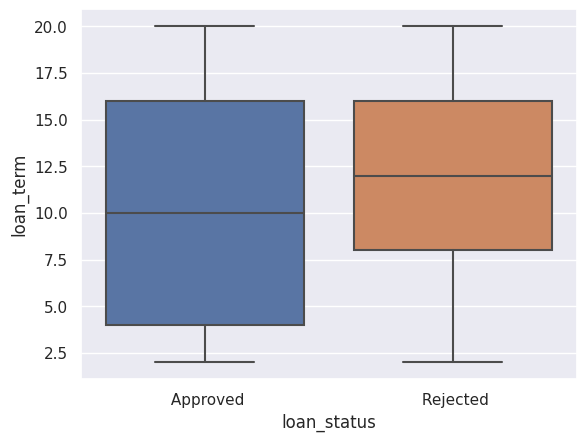

In [ ]:
sns.boxplot(x=lp1[' loan_status'], y=lp1[' loan_term'])
plt.xlabel('loan_status')
plt.ylabel('loan_term')

Text(0, 0.5, 'loan_amount')

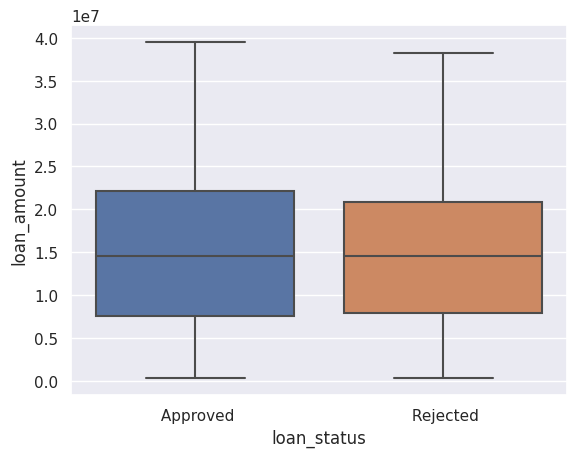

In [ ]:
sns.boxplot(x=lp1[' loan_status'], y=lp1[' loan_amount'])
plt.xlabel('loan_status')
plt.ylabel('loan_amount')

<Axes: xlabel=' income_annum', ylabel=' residential_assets_value'>

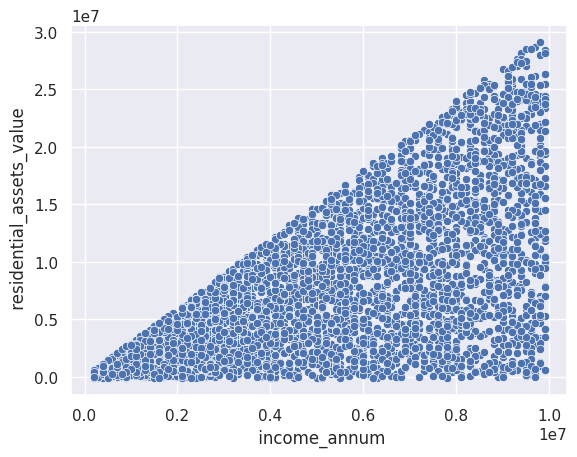

In [ ]:
sns.scatterplot(x=lp1[' income_annum'], y=lp1[' residential_assets_value'])
#plt.xticks(rotation=90)
#plt.show()

<Axes: xlabel=' income_annum', ylabel=' commercial_assets_value'>

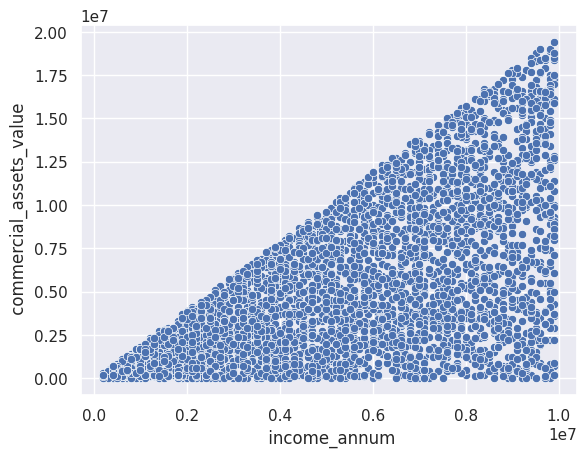

In [ ]:
sns.scatterplot(x=lp1[' income_annum'], y=lp1[' commercial_assets_value'])

#plt.xticks(rotation=90)
#plt.show()

<Axes: xlabel=' self_employed', ylabel=' loan_amount'>

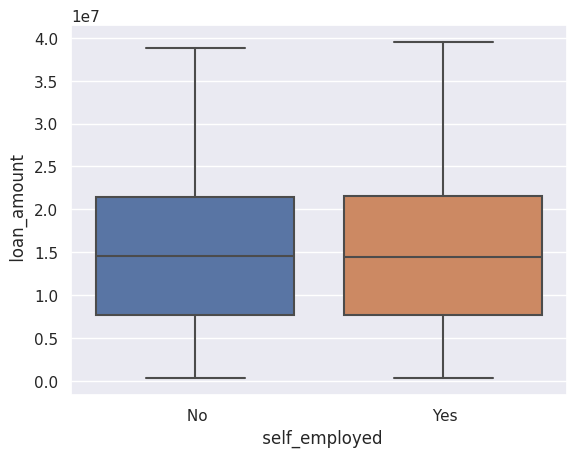

In [ ]:
sns.boxplot(x=lp1[' self_employed'], y=lp1[' loan_amount'])

#plt.xticks(rotation=90)
#plt.show()

<Axes: xlabel=' self_employed'>

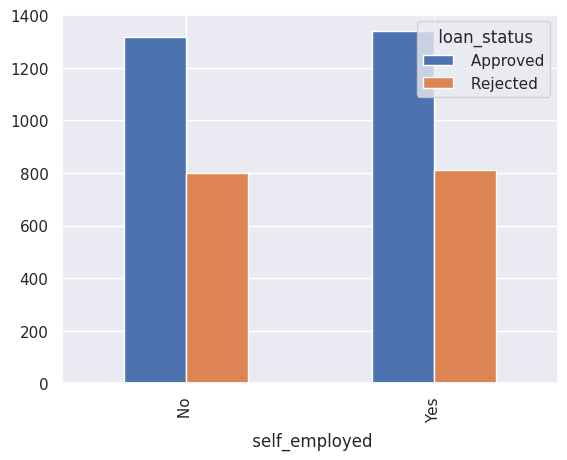

In [ ]:
ct = pd.crosstab(lp1[' self_employed'], lp1[' loan_status'])
ct.plot(kind='bar')

<Axes: xlabel=' education'>

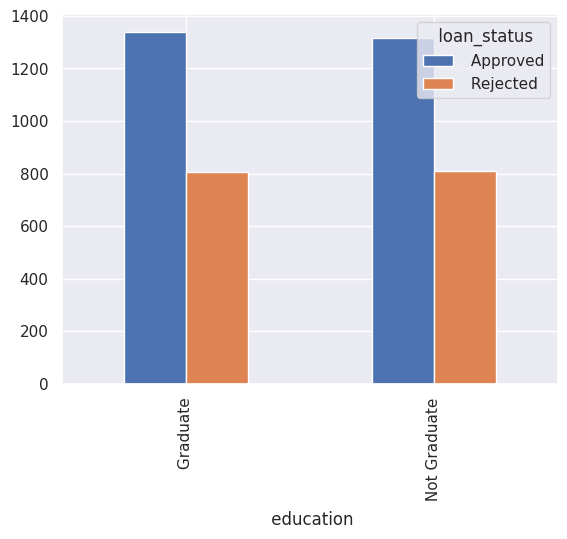

In [ ]:
ct = pd.crosstab(lp1[' education'], lp1[' loan_status'])
ct.plot(kind='bar')

<Axes: xlabel=' education'>

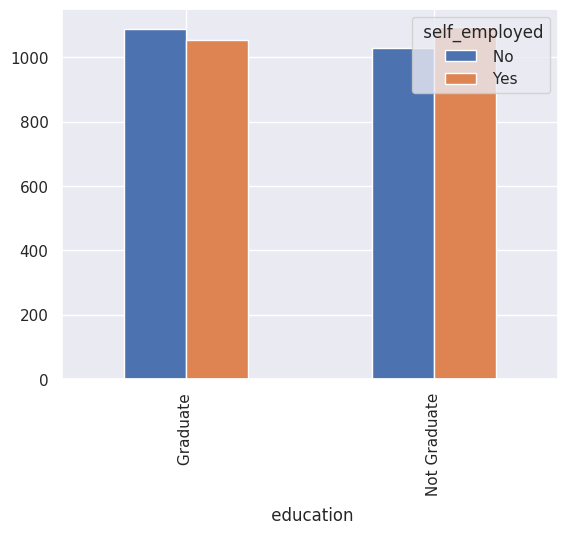

In [ ]:
ct = pd.crosstab(lp1[' education'], lp1[' self_employed'])
ct.plot(kind='bar')

<Axes: xlabel=' income_annum', ylabel=' luxury_assets_value'>

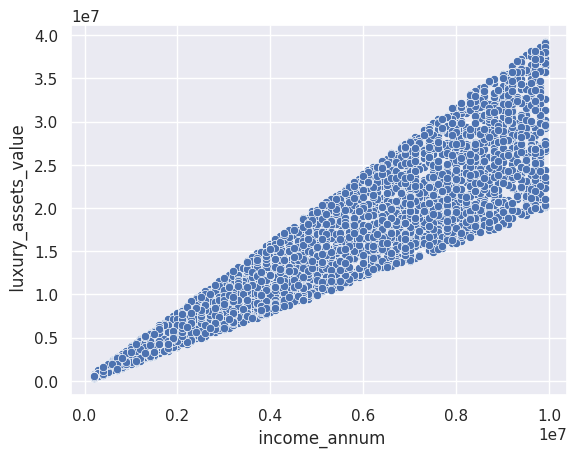

In [ ]:
sns.scatterplot(x=lp1[' income_annum'], y=lp1[' luxury_assets_value'])

#plt.xticks(rotation=90)
#plt.show()

<Axes: xlabel=' income_annum', ylabel=' bank_asset_value'>

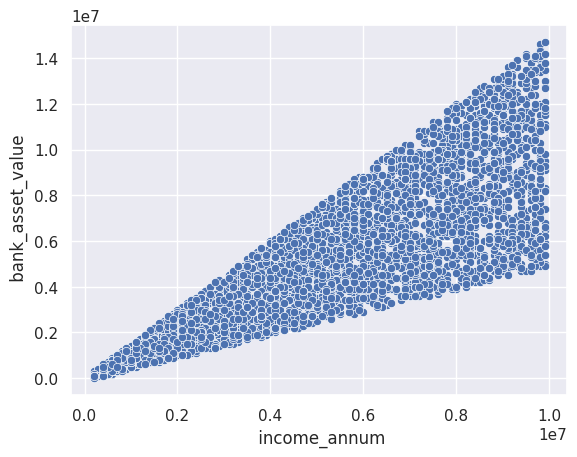

In [ ]:
sns.scatterplot(x=lp1[' income_annum'], y=lp1[' bank_asset_value'])

#plt.xticks(rotation=90)
#plt.show()

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

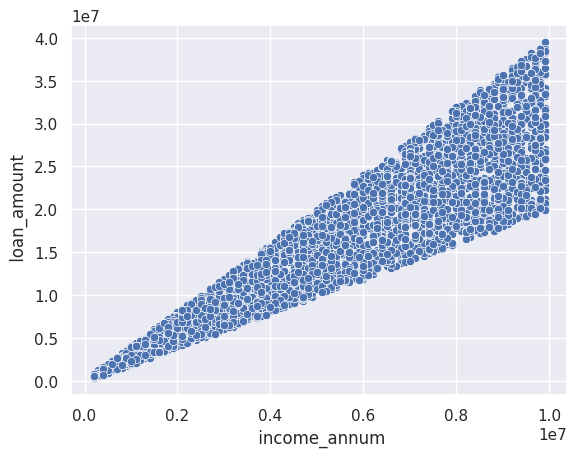

In [ ]:
sns.scatterplot(x=lp1[' income_annum'], y=lp1[' loan_amount'])

#plt.xticks(rotation=90)
#plt.show()

In [ ]:
l = lp1.iloc[:, [1,2,11]]
lp3 = pd.concat([lp2, l], axis=1)

lp3

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Graduate,No,Approved
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Not Graduate,Yes,Rejected
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Graduate,No,Rejected
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Graduate,No,Rejected
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Not Graduate,Yes,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Graduate,Yes,Rejected
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Not Graduate,Yes,Approved
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Not Graduate,No,Rejected
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Not Graduate,No,Approved


In [ ]:
# Let's encode catagorical input variable

lp4 = pd.get_dummies(lp3, columns=[' education', ' self_employed'])

# let's encode target variable

lp4[' loan_status'] = lp3[' loan_status'].replace(['Approve'], 'Approved')

lp4

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0,1,1,0


In [ ]:
lp4[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit([' Rejected', ' Approved'])

print(le.classes_)

#lp5[' loan_status'].isin([' Approve'])

lp4[' loan_status'] = le.transform(lp4[' loan_status'])

a = list(le.inverse_transform([0,1]))
print(a)
lp4


[' Approved' ' Rejected']
[' Approved', ' Rejected']


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0,1,1,0


In [ ]:
lp4.describe()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.377840,0.502225,0.497775,0.496369,0.503631
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904,0.500054,0.500054,0.500045,0.500045
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-138-f7a3d61cbf50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lp4[' loan_status'])


<Axes: xlabel=' loan_status', ylabel='Density'>

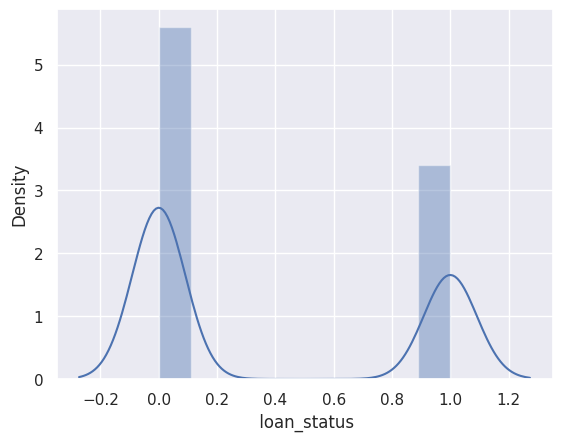

In [ ]:
sns.distplot(lp4[' loan_status'])

In [ ]:
lp4.corr()[' loan_status'].sort_values()

 cibil_score                -0.770518
 loan_amount                -0.016150
 commercial_assets_value    -0.008246
 education_ Graduate        -0.004918
 self_employed_ Yes         -0.000345
 self_employed_ No           0.000345
 education_ Not Graduate     0.004918
 bank_asset_value            0.006778
 residential_assets_value    0.014367
 income_annum                0.015189
 luxury_assets_value         0.015465
 no_of_dependents            0.018114
 loan_term                   0.113036
 loan_status                 1.000000
Name:  loan_status, dtype: float64

<Axes: >

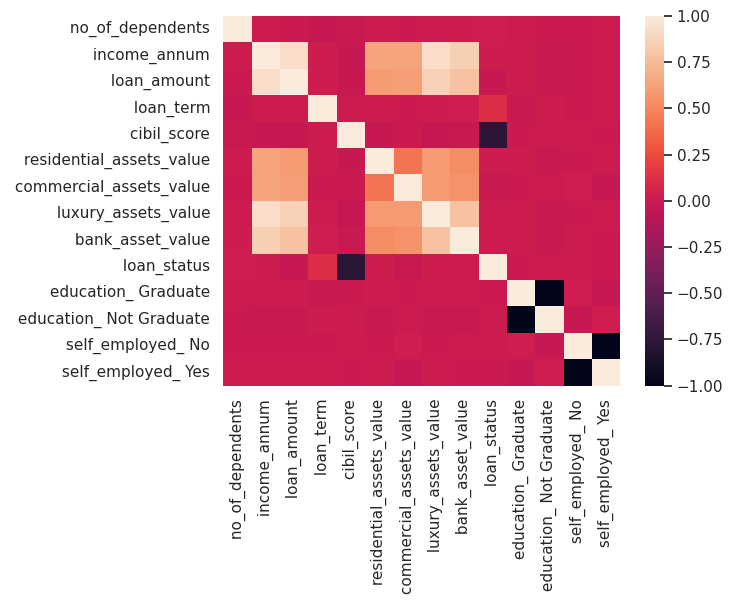

In [ ]:
sns.heatmap(lp4.corr())

<ipython-input-141-7e3726b9a1dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lp4[j])
<ipython-input-141-7e3726b9a1dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lp4[j])
<ipython-input-141-7e3726b9a1dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

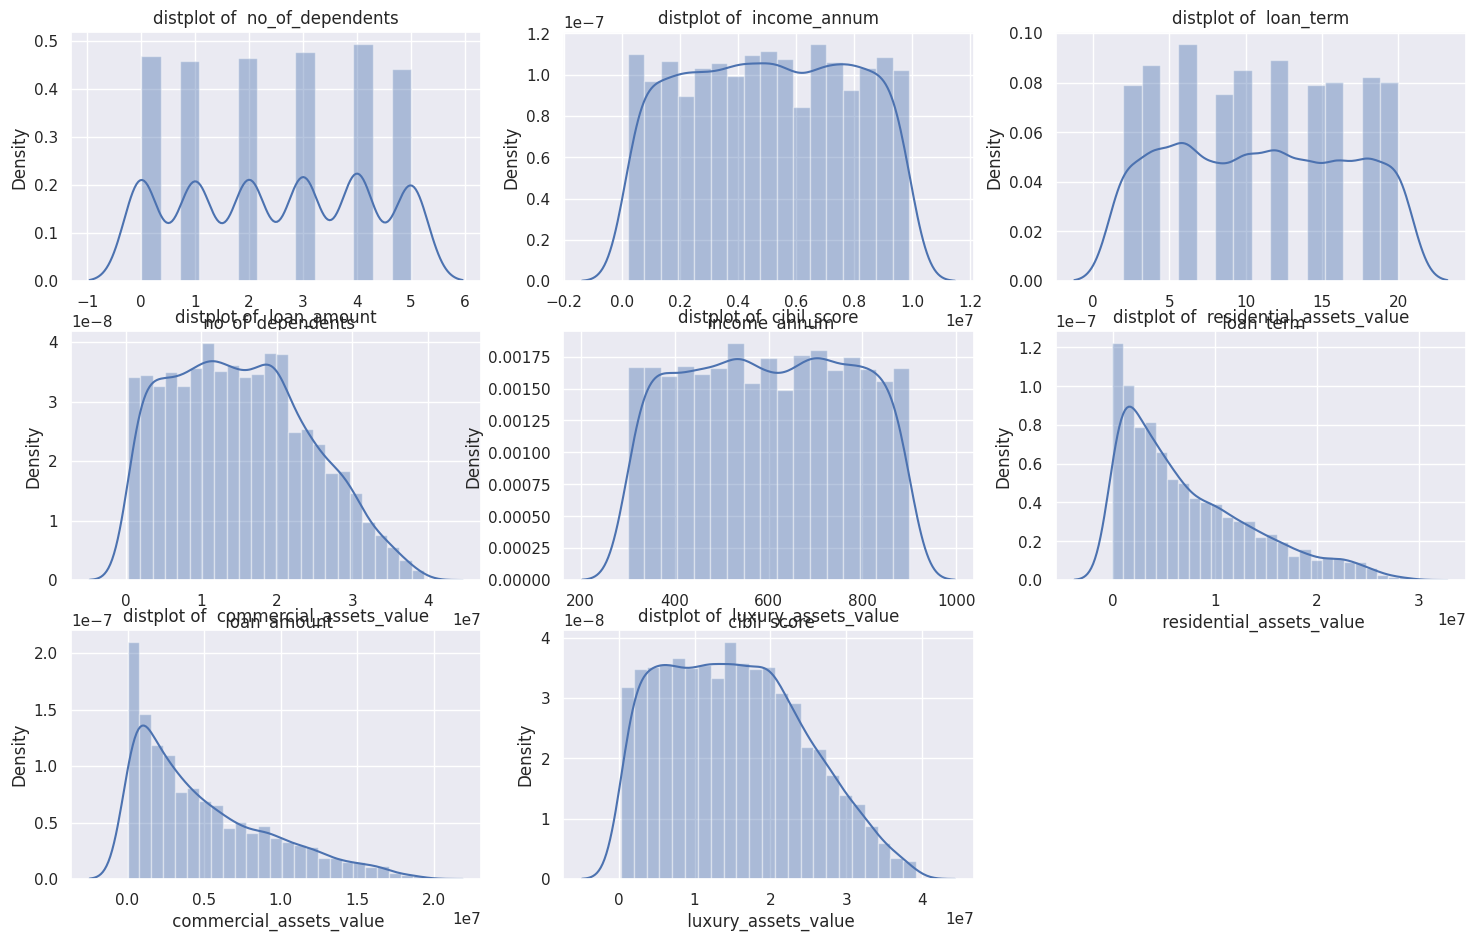

In [ ]:
numerical_column = [' no_of_dependents', ' income_annum', ' loan_term', ' loan_amount', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

import seaborn as sns


plt.figure(figsize=(18,11))
for i,j in zip(range(1, 9), numerical_column):
    plt.subplot(3, 3, i)
    sns.distplot(lp4[j])
    sns.set_theme()
    plt.title('distplot of {}'.format(j))

# Data Preparation

In [ ]:
lp5 = lp4[lp4[' residential_assets_value'] >= 0]


**Balancing dataset**

In [ ]:
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(lp5.iloc[:, 0:-1], lp5[' loan_status'])

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='Loan_status'>

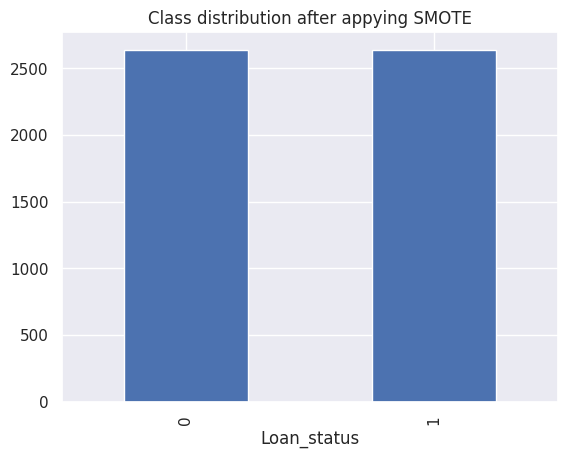

In [ ]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Loan_status')

In [ ]:
x_resampled

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,1,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,1,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,2,5959063,17476609,17,417,10591226,6000000,16367836,4839182,1,0,0,0
5276,2,8239448,27516549,13,370,23576138,15508274,18765105,4852276,1,0,1,0
5277,3,1628943,4144719,18,514,271056,1026336,5328943,1971056,1,0,0,0
5278,4,6189281,20280843,14,348,9846750,10631813,19806157,6746750,1,0,1,0


In [ ]:

lp6 = x_resampled.loc[:,x_resampled.columns != ' loan_status']
y = y_resampled



In [ ]:
lp6.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No
count,5280.000000,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.000000
mean,2.426326,5.064442e+06,1.506826e+07,10.950947,565.686932,7.540110e+06,4.965206e+06,1.518821e+07,4.970789e+06,0.447538,0.445455,0.448864
std,1.640632,2.789553e+06,8.940464e+06,5.459980,171.234624,6.503620e+06,4.380767e+06,9.078950e+06,3.213502e+06,0.497287,0.497063,0.497425
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,420.000000,2.200000e+06,1.400000e+06,7.600000e+06,2.400000e+06,0.000000,0.000000,0.000000
50%,2.000000,5.100000e+06,1.450000e+07,11.000000,533.000000,5.700000e+06,3.700000e+06,1.470000e+07,4.600000e+06,0.000000,0.000000,0.000000
75%,4.000000,7.500000e+06,2.130000e+07,16.000000,711.250000,1.134963e+07,7.600000e+06,2.170000e+07,7.001219e+06,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler


obj= StandardScaler()



# standardization
lp7 = pd.DataFrame(obj.fit_transform(lp6),columns = lp6.columns)


lp7

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No
0,-0.259879,1.626062,1.659102,0.192153,1.240013,-0.790421,2.884425,0.827464,0.942740,1.111057,-0.896258,1.108083
1,-1.479037,-0.345766,-0.320848,-0.540520,-0.868405,-0.744288,-0.631275,-0.703695,-0.519977,-0.900044,1.115750,-0.902459
2,0.349700,1.446805,1.636730,1.657499,-0.348601,-0.067678,-0.106203,1.995110,2.436579,1.111057,-0.896258,1.108083
3,0.349700,1.124142,1.748591,-0.540520,-0.576380,1.639226,-0.380153,0.893557,0.911619,1.111057,-0.896258,1.108083
4,1.568858,1.697765,1.021491,1.657499,-1.072822,0.747330,0.738478,1.565504,0.009091,-0.900044,1.115750,-0.902459
...,...,...,...,...,...,...,...,...,...,...,...,...
5275,-0.259879,0.320734,0.269402,1.107994,-0.868405,0.469186,0.236235,0.129942,-0.040958,-0.900044,-0.896258,-0.902459
5276,-0.259879,1.138285,1.392485,0.375321,-1.142908,2.465942,2.406900,0.394014,-0.036883,-0.900044,1.115750,-0.902459
5277,0.349700,-1.231676,-1.221925,1.291162,-0.301877,-1.117800,-0.899213,-1.086051,-0.933566,-0.900044,-0.896258,-0.902459
5278,0.959279,0.403271,0.583088,0.558490,-1.271399,0.354704,1.293642,0.508691,0.552708,-0.900044,1.115750,-0.902459


In [ ]:
lp7.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No
count,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03
mean,1.076580e-17,-5.315613e-17,2.455948e-17,-4.306320e-17,-1.399554e-16,5.382900e-17,-9.958364e-17,-8.276208e-17,7.603346e-17,7.536059e-17,-4.306320e-17,5.382900e-17
std,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00
min,-1.479037e+00,-1.743972e+00,-1.652001e+00,-1.639529e+00,-1.551743e+00,-1.159481e+00,-1.133518e+00,-1.640016e+00,-1.546991e+00,-9.000438e-01,-8.962582e-01,-9.024594e-01
25%,-8.694582e-01,-8.476863e-01,-8.242255e-01,-9.068560e-01,-8.508836e-01,-8.211760e-01,-8.139086e-01,-8.358819e-01,-8.000717e-01,-9.000438e-01,-8.962582e-01,-9.024594e-01
50%,-2.598792e-01,1.274801e-02,-6.356661e-02,8.984955e-03,-1.909078e-01,-2.829631e-01,-2.888366e-01,-5.377900e-02,-1.153955e-01,-9.000438e-01,-8.962582e-01,-9.024594e-01
75%,9.592788e-01,8.731823e-01,6.970923e-01,9.248259e-01,8.501602e-01,5.858096e-01,6.015029e-01,7.173083e-01,6.319033e-01,1.111057e+00,1.115750e+00,1.108083e+00
max,1.568858e+00,1.733617e+00,2.732974e+00,1.657499e+00,1.952553e+00,3.315374e+00,3.295350e+00,2.645027e+00,3.027891e+00,1.111057e+00,1.115750e+00,1.108083e+00


In [ ]:
lp7.isnull().sum()

 no_of_dependents            0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 education_ Graduate         0
 education_ Not Graduate     0
 self_employed_ No           0
dtype: int64

In [ ]:
lp7['Loan_status'] = y

lp7

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,Loan_status
0,-0.259879,1.626062,1.659102,0.192153,1.240013,-0.790421,2.884425,0.827464,0.942740,1.111057,-0.896258,1.108083,0
1,-1.479037,-0.345766,-0.320848,-0.540520,-0.868405,-0.744288,-0.631275,-0.703695,-0.519977,-0.900044,1.115750,-0.902459,1
2,0.349700,1.446805,1.636730,1.657499,-0.348601,-0.067678,-0.106203,1.995110,2.436579,1.111057,-0.896258,1.108083,1
3,0.349700,1.124142,1.748591,-0.540520,-0.576380,1.639226,-0.380153,0.893557,0.911619,1.111057,-0.896258,1.108083,1
4,1.568858,1.697765,1.021491,1.657499,-1.072822,0.747330,0.738478,1.565504,0.009091,-0.900044,1.115750,-0.902459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,-0.259879,0.320734,0.269402,1.107994,-0.868405,0.469186,0.236235,0.129942,-0.040958,-0.900044,-0.896258,-0.902459,1
5276,-0.259879,1.138285,1.392485,0.375321,-1.142908,2.465942,2.406900,0.394014,-0.036883,-0.900044,1.115750,-0.902459,1
5277,0.349700,-1.231676,-1.221925,1.291162,-0.301877,-1.117800,-0.899213,-1.086051,-0.933566,-0.900044,-0.896258,-0.902459,1
5278,0.959279,0.403271,0.583088,0.558490,-1.271399,0.354704,1.293642,0.508691,0.552708,-0.900044,1.115750,-0.902459,1


In [ ]:
from scipy.stats import zscore

lp

lp8 = lp7[(np.abs(zscore(lp7)) < 3).all(axis=1)]

lp8

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,Loan_status
0,-0.259879,1.626062,1.659102,0.192153,1.240013,-0.790421,2.884425,0.827464,0.942740,1.111057,-0.896258,1.108083,0
1,-1.479037,-0.345766,-0.320848,-0.540520,-0.868405,-0.744288,-0.631275,-0.703695,-0.519977,-0.900044,1.115750,-0.902459,1
2,0.349700,1.446805,1.636730,1.657499,-0.348601,-0.067678,-0.106203,1.995110,2.436579,1.111057,-0.896258,1.108083,1
3,0.349700,1.124142,1.748591,-0.540520,-0.576380,1.639226,-0.380153,0.893557,0.911619,1.111057,-0.896258,1.108083,1
4,1.568858,1.697765,1.021491,1.657499,-1.072822,0.747330,0.738478,1.565504,0.009091,-0.900044,1.115750,-0.902459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,-0.259879,0.320734,0.269402,1.107994,-0.868405,0.469186,0.236235,0.129942,-0.040958,-0.900044,-0.896258,-0.902459,1
5276,-0.259879,1.138285,1.392485,0.375321,-1.142908,2.465942,2.406900,0.394014,-0.036883,-0.900044,1.115750,-0.902459,1
5277,0.349700,-1.231676,-1.221925,1.291162,-0.301877,-1.117800,-0.899213,-1.086051,-0.933566,-0.900044,-0.896258,-0.902459,1
5278,0.959279,0.403271,0.583088,0.558490,-1.271399,0.354704,1.293642,0.508691,0.552708,-0.900044,1.115750,-0.902459,1


<ipython-input-180-f2e25b403966>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lp8[j])
<ipython-input-180-f2e25b403966>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lp8[j])
<ipython-input-180-f2e25b403966>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

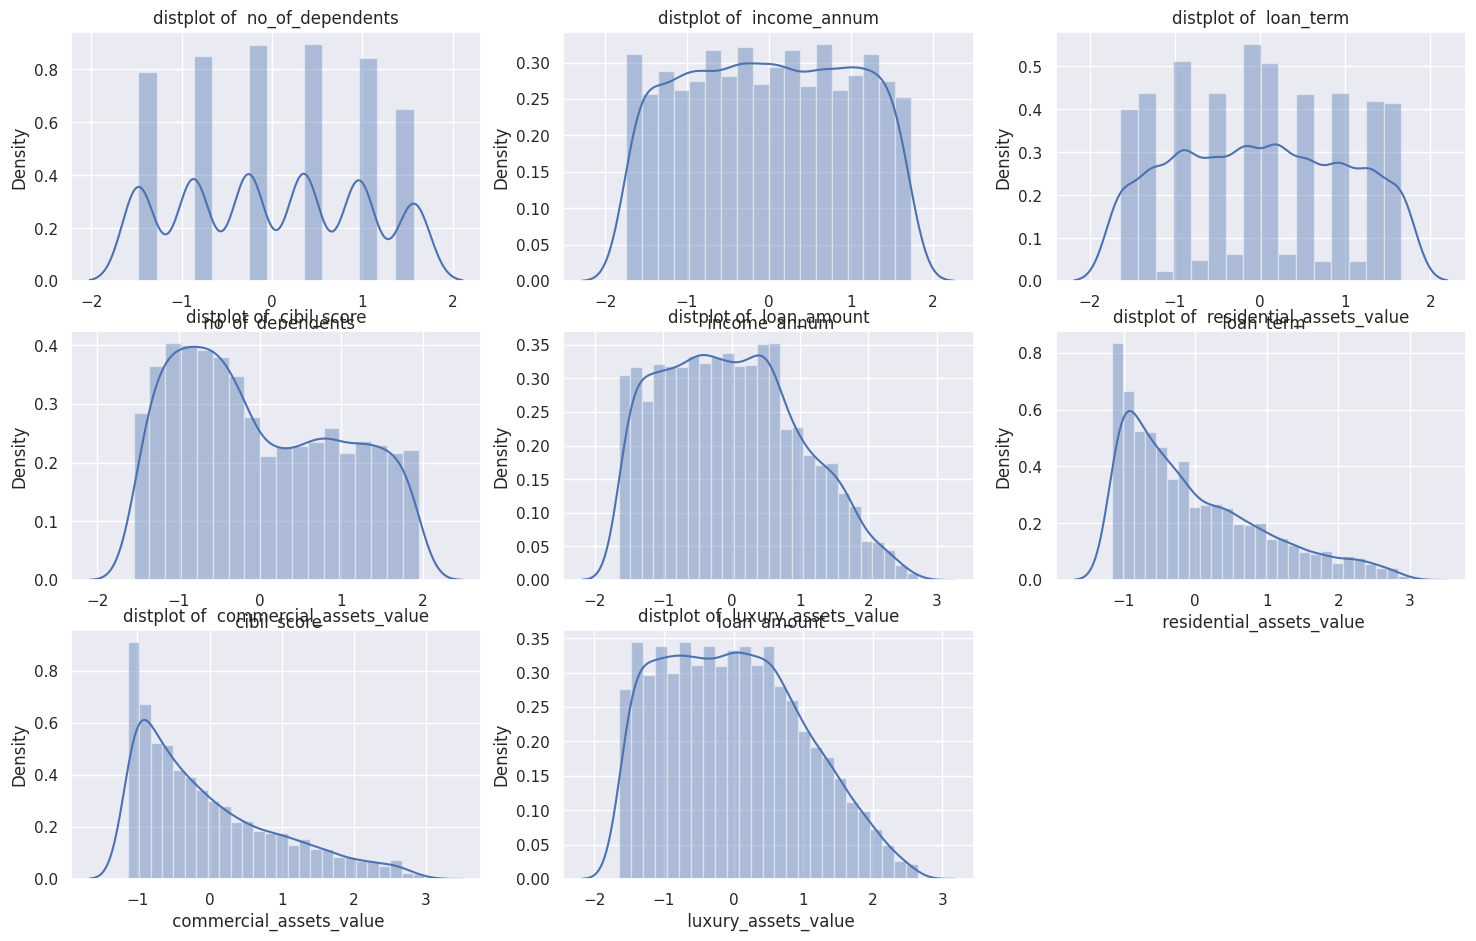

In [ ]:
numerical_column = [' no_of_dependents', ' income_annum', ' loan_term', ' cibil_score', ' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

import seaborn as sns


plt.figure(figsize=(18,11))
for i,j in zip(range(1, 9), numerical_column):
    plt.subplot(3, 3, i)
    sns.distplot(lp8[j])
    sns.set_theme()
    plt.title('distplot of {}'.format(j))

In [ ]:
lp9 = lp8.drop(['Loan_status'], axis=1)
y = lp8['Loan_status']

lp9

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No
0,-0.259879,1.626062,1.659102,0.192153,1.240013,-0.790421,2.884425,0.827464,0.942740,1.111057,-0.896258,1.108083
1,-1.479037,-0.345766,-0.320848,-0.540520,-0.868405,-0.744288,-0.631275,-0.703695,-0.519977,-0.900044,1.115750,-0.902459
2,0.349700,1.446805,1.636730,1.657499,-0.348601,-0.067678,-0.106203,1.995110,2.436579,1.111057,-0.896258,1.108083
3,0.349700,1.124142,1.748591,-0.540520,-0.576380,1.639226,-0.380153,0.893557,0.911619,1.111057,-0.896258,1.108083
4,1.568858,1.697765,1.021491,1.657499,-1.072822,0.747330,0.738478,1.565504,0.009091,-0.900044,1.115750,-0.902459
...,...,...,...,...,...,...,...,...,...,...,...,...
5275,-0.259879,0.320734,0.269402,1.107994,-0.868405,0.469186,0.236235,0.129942,-0.040958,-0.900044,-0.896258,-0.902459
5276,-0.259879,1.138285,1.392485,0.375321,-1.142908,2.465942,2.406900,0.394014,-0.036883,-0.900044,1.115750,-0.902459
5277,0.349700,-1.231676,-1.221925,1.291162,-0.301877,-1.117800,-0.899213,-1.086051,-0.933566,-0.900044,-0.896258,-0.902459
5278,0.959279,0.403271,0.583088,0.558490,-1.271399,0.354704,1.293642,0.508691,0.552708,-0.900044,1.115750,-0.902459


In [ ]:
lp9.shape

(5243, 12)

# Splitting dataset in Train, valid and Test dataset

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(lp9, y, test_size=0.2, random_state=42)



X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train dataset:", X_train.shape)
print("Test dataset:", X_test.shape)
print("Validation dataset:", X_valid.shape)
#


Train dataset: (3355, 12)
Test dataset: (1049, 12)
Validation dataset: (839, 12)


# Model Selection

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


# Logistice Regression

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       436
           1       0.92      0.93      0.92       403

    accuracy                           0.93       839
   macro avg       0.93      0.93      0.93       839
weighted avg       0.93      0.93      0.93       839



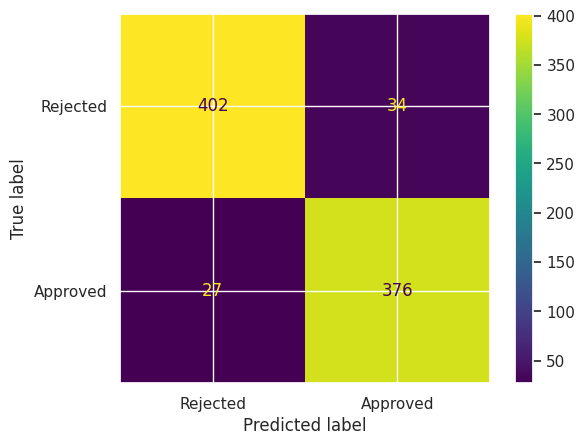

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred_lg = lg.predict(X_valid)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


print(classification_report(y_valid, y_pred_lg))


confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_lg)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# K-Neighourest Neighbour

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       436
           1       0.94      0.92      0.93       403

    accuracy                           0.93       839
   macro avg       0.93      0.93      0.93       839
weighted avg       0.93      0.93      0.93       839



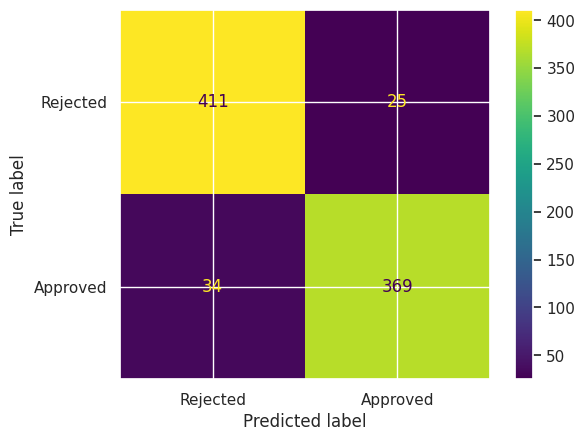

In [ ]:

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_valid)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_valid, y_pred_knn))


confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_knn)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# Support Vector Classifier

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       436
           1       0.93      0.94      0.93       403

    accuracy                           0.94       839
   macro avg       0.94      0.94      0.94       839
weighted avg       0.94      0.94      0.94       839



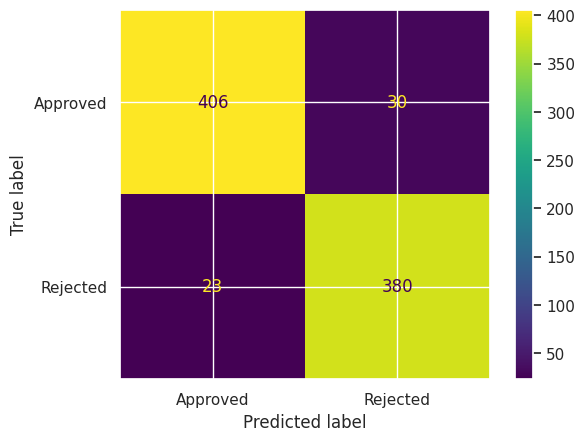

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_valid)

print(classification_report(y_valid, y_pred_svm))

confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_svm)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       436
           1       0.98      0.98      0.98       403

    accuracy                           0.98       839
   macro avg       0.98      0.98      0.98       839
weighted avg       0.98      0.98      0.98       839



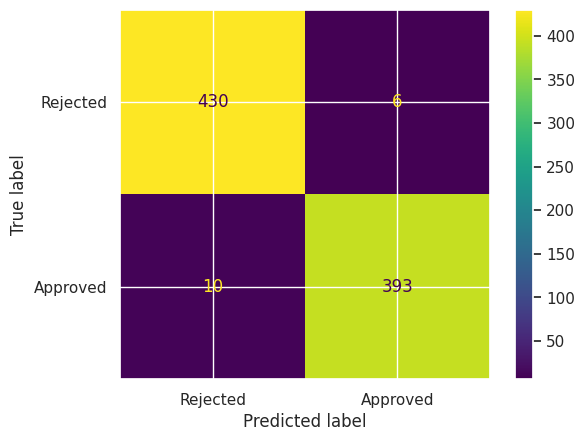

In [ ]:
 from sklearn import tree


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_valid)

print(classification_report(y_valid, y_pred_dt))

confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_dt)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()


# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       436
           1       0.99      0.98      0.99       403

    accuracy                           0.99       839
   macro avg       0.99      0.99      0.99       839
weighted avg       0.99      0.99      0.99       839



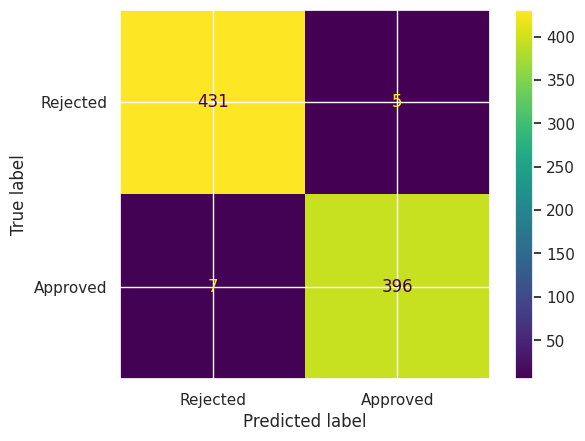

In [ ]:
rdt = RandomForestClassifier()
rdt.fit(X_train, y_train)

y_pred_rdt = rdt.predict(X_valid)

print(classification_report(y_valid, y_pred_rdt))


confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_rdt)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       436
           1       0.99      0.98      0.98       403

    accuracy                           0.98       839
   macro avg       0.98      0.98      0.98       839
weighted avg       0.98      0.98      0.98       839



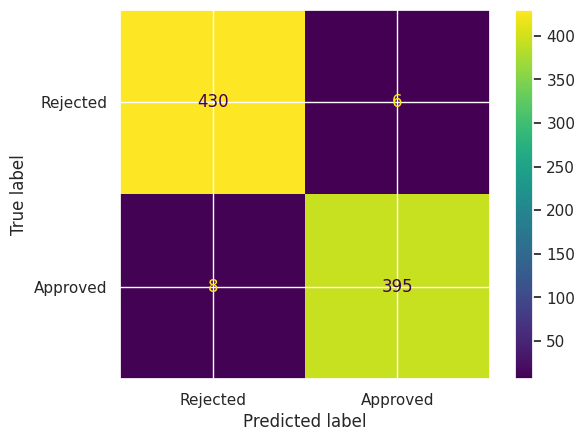

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_valid)

print(classification_report(y_valid, y_pred_gbc))


confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_gbc)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# Adaboost Classifier

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       436
           1       0.98      0.98      0.98       403

    accuracy                           0.98       839
   macro avg       0.98      0.98      0.98       839
weighted avg       0.98      0.98      0.98       839



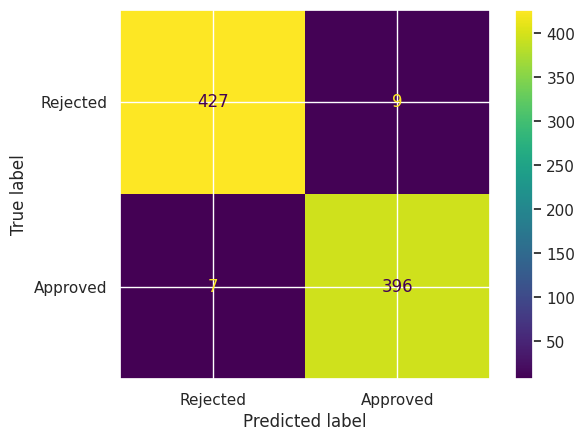

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_valid)

print(classification_report(y_valid, y_pred_abc))
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_abc)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# Extra-Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       436
           1       0.95      0.98      0.97       403

    accuracy                           0.97       839
   macro avg       0.97      0.97      0.97       839
weighted avg       0.97      0.97      0.97       839



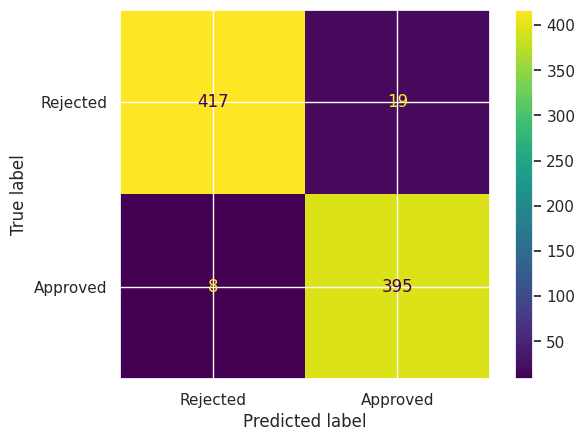

In [ ]:

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_valid)


print(classification_report(y_valid, y_pred_etc))
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_etc)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

# XGBoost Classifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.99      0.99      0.99       403

    accuracy                           0.99       839
   macro avg       0.99      0.99      0.99       839
weighted avg       0.99      0.99      0.99       839



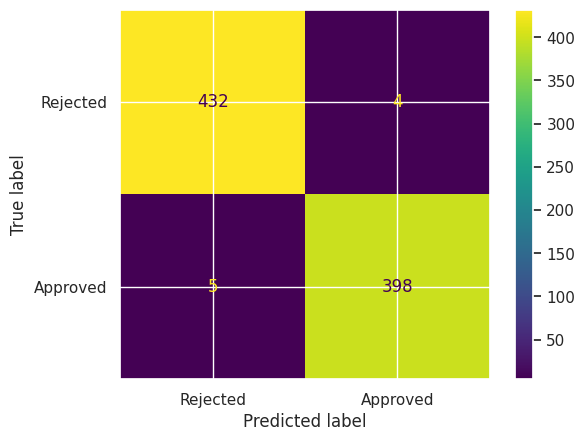

In [ ]:

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_valid)

print(classification_report(y_valid, y_pred_xgb))
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_xgb)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

**From Above model selection, we have selected  Random Forest classifier as it  to fine tune the parameters to get best results.** *italicized text*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 700, step=50),
              'max_features':randint(1,10),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
          }

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train,y_train)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
Best random search score is: 0.9842033014612351


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
          }

dtc = DecisionTreeClassifier()

dtc_random = RandomizedSearchCV(dtc, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random_dtc = dtc_random.fit(X_train, y_train)

# random random search results
print('Best random search hyperparameters are: '+str(model_random_dtc.best_params_))
print('Best random search score is: '+str(model_random_dtc.best_score_))

Best random search hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}
Best random search score is: 0.9716749088532964


# Testing Model on test data

As we can see Random Forest and xtreme gradient boosting classifier are giving best results.
Let's test above models on test data as well.


**Fine tuned Random Forest classifier**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       509
           1       0.98      0.99      0.98       540

    accuracy                           0.98      1049
   macro avg       0.98      0.98      0.98      1049
weighted avg       0.98      0.98      0.98      1049



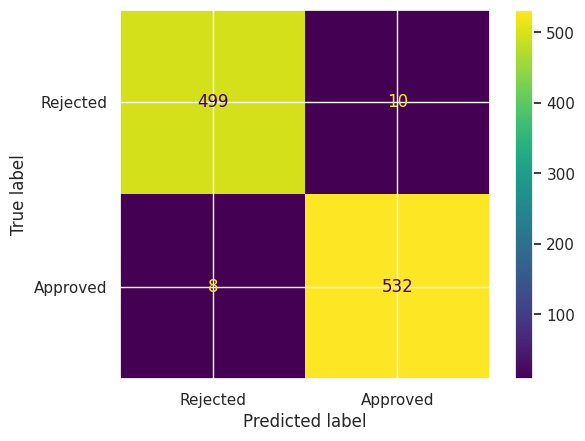

In [ ]:
y_test_rdt = rf_random.predict(X_test)

print(classification_report(y_test, y_test_rdt))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_rdt)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

**Ransom Forest Classifier**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       509
           1       0.99      0.98      0.98       540

    accuracy                           0.98      1049
   macro avg       0.98      0.98      0.98      1049
weighted avg       0.98      0.98      0.98      1049



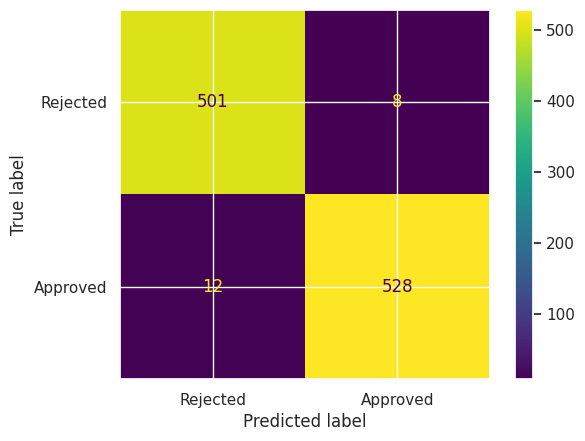

In [ ]:
y_test_rdt = rdt.predict(X_test)

print(classification_report(y_test, y_test_rdt))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_rdt)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

**Xtreeme Gradient Boosting**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       509
           1       0.99      0.98      0.98       540

    accuracy                           0.98      1049
   macro avg       0.98      0.98      0.98      1049
weighted avg       0.98      0.98      0.98      1049



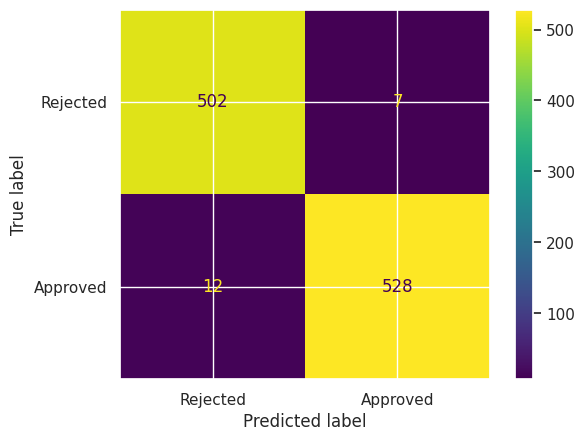

In [ ]:
y_test_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_test_xgb))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_xgb)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rejected", "Approved"])

cm_display.plot()
plt.show()

**Conclusion:**

From above analysis we can conclude that Xtreeme Gradient Boosting give 99% accuracy on valid dataset and 98% accuracy for test dataset.
Thus, Xtreeme Gradient boosting can predict if user can get loan or not.